In [ ]:
# 필요한 패키지 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# 데이터 로드
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/양주연_stat.csv",index_col = 'searchDate')
df

,dailyViewCount,subscriberCount,videoCount,favorablePercent,activePercent
searchDate,,,,,
2019-12-01,5974,53700,100,97,58
2019-12-02,9119,53700,100,96,42
2019-12-03,6745,53700,100,97,37
2019-12-04,4109,53700,100,97,30
2019-12-05,4250,53700,100,97,31
...,...,...,...,...,...
2021-02-12,19548,83000,233,96,34
2021-02-13,16749,83000,233,96,34
2021-02-14,16773,83100,233,96,34


In [ ]:
# 학습/검증 데이터 분리
train = df[:int(0.8*(len(df)))]
valid = df[int(0.8*(len(df))):]

In [ ]:
# 모델 임포트 / 학습
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
# 검증 데이터로 예측
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

/usr/local/lib/python3.6/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [ ]:
# 예측 값 리스트 생성
pre = []
for i in range(len(prediction)):
  pre.append(prediction[i][1])

In [ ]:
# MAE 계산
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(list(df['subscriberCount'][-len(pre):]), pre)
print("MAE 값 : ",mae)

MAE 값 :  7722.886753197771


In [ ]:
# 예측 값을 데이터 프레임으로 변경
from math import *
cols = df.columns
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for i in range(0, len(prediction)):
  pred.iloc[i] = prediction[i]

In [ ]:
# 미래 예측(예측 기간 : steps=일수)
step=9
model = VAR(endog=df)
model_fit = model.fit()
yhat = model_fit.forecast(model_fit.y, steps=step)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [ ]:
# 기존 데이터 마지막 날의 다음 날을 구함(= 미래 예측 데이터의 시작 날짜)
next = str(pd.date_range(df.index[-1], periods=2)[1])[:10]

In [ ]:
# 예측 데이터 날짜 리스트 생성
forecast_date = []
for i in range(step):
  forecast_date.append(str(pd.date_range(next, periods=step)[i])[:10])

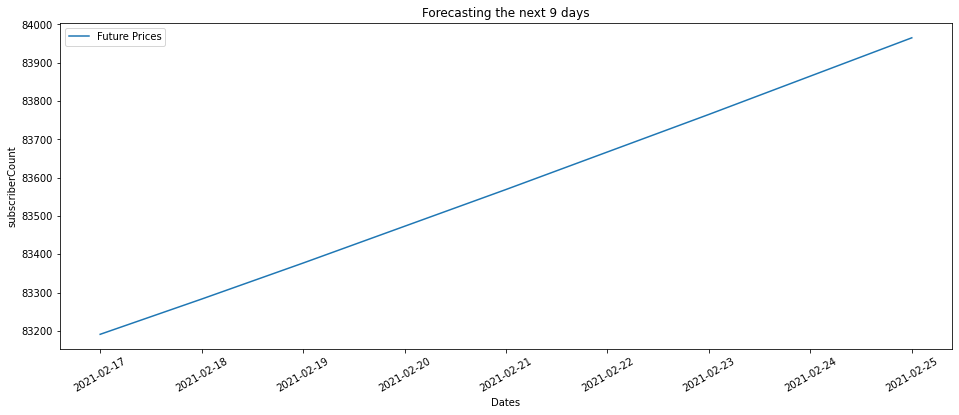

In [ ]:
# 미래 예측 값 시각화
plt.figure(figsize=(16,6))
plt.plot(yhat[:,1].astype(int), label="Future Prices")
plt.ylabel("subscriberCount")
plt.xlabel("Dates")
plt.title(f"Forecasting the next {len(yhat)} days")
plt.xticks(list(range(step)), forecast_date, rotation = 30)
plt.legend()
plt.show()

In [ ]:
yhat[:,1].astype(int)

array([83191, 83283, 83377, 83473, 83569, 83667, 83765, 83865, 83965])

In [ ]:
# 기존(과거) 데이터와 예측(미래) 데이터를 한 배열로 합침
arr = np.append(df['subscriberCount'].to_numpy(), yhat[:,1].astype(int))

In [ ]:
# 날짜 데이터 배열 생성
date_arr = []
for i in range(len(arr)):
  # 날짜가 너무 많으면 보기 힘드므로 10일에 한번씩만 기록하고 나머지는 공백
  if i % 10 == 0:
    date_arr.append(str(pd.date_range(df.index[0], periods=len(arr))[i])[:10])
  else:
    date_arr.append("")

# 마지막 날짜로부터 예측일 범주까지는 비움(마지막날이랑 가까우면 그래프에서 겹쳐서 안보임)
for i in range(1,step):
  date_arr[len(date_arr)-i] = ""

# 전체 날짜 데이터 마지막 날을 예측 데이터 마지막 날로 대체
date_arr[len(date_arr)-1] = forecast_date[-1]

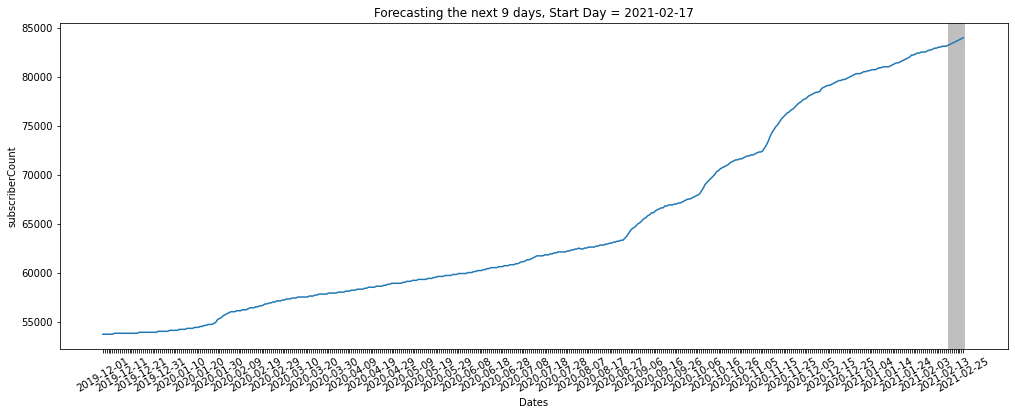

In [ ]:
plt.figure(figsize=(17,6))
plt.plot(arr)
plt.ylabel("subscriberCount")
plt.xlabel("Dates")
plt.title(f"Forecasting the next {len(yhat)} days, Start Day = {forecast_date[0]}")
# 미래 예측 구간 강조
plt.axvspan(len(df), len(arr), facecolor='gray', alpha=0.5)
# x 축 값 이름 변경 / 회전
plt.xticks(list(range(len(arr))), date_arr, rotation = 30)
plt.show()